In [ ]:
#Installing the necessary libraries

In [ ]:
!pip install tld

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 KB 18.6 MB/s eta 0:00:00


In [ ]:
!pip install python-whois

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 KB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-whois: filename=python_whois-0.8.0-py3-none-any.whl size=103262 sha256=c01e62657f589a4d0fc24517ef23a7ee4c8236e4786bd16d53593a5d479d7cdb
  Stored in directory: /root/.cache/pip/wheels/e6/e9/d3/1e41a6c95b398de12c5a332ff28805aa44e68aa317ea60266d
Successfully built python-whois


In [ ]:
!pip install pyquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importing necessary libraries
import sklearn.metrics as metrics
import datetime
from pyquery import PyQuery as pq
import re
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from requests import get
import math
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
#Reading the data file
df = pd.read_csv("/content/drive/MyDrive/Miscellaneous/df1000.csv")
#Creating a copy to compare post feature extraction
df_copy = df

In [ ]:
#To display all the columns and rows
pd.set_option('display.max_columns', 1000); 
pd.set_option('display.max_rows', 1000); 
pd.set_option('display.width', 1000);

In [ ]:
#To ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#To supress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
#Checking different types of data
count = df.type.value_counts()
count

defacement    562
benign        349
phishing       58
malware        40
Name: type, dtype: int64

In [ ]:
#Checking for null values
df.isnull().sum()

url           0
type          0
domain        0
ip_address    0
dtype: int64

In [ ]:
#Checking for duplicate data and removing it
print(df.shape)
df.drop_duplicates()
print(df.shape)

(1009, 4)
(1009, 4)


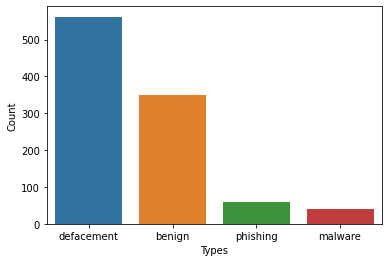

In [ ]:
#Checking for class imbalance
sns.barplot(x=count.index, y=count)
plt.xlabel('Types')
plt.ylabel('Count');

In [ ]:
#Adding a new column for label - 0 is benign and other all types are considered as malicious which is represented by 1
df['label'] = [0 if x =='benign' else 1 for x in df['type']]

In [ ]:
#Checking count of both the labels
count1 = df.label.value_counts()
count1

1    660
0    349
Name: label, dtype: int64

In [ ]:
# LEXICAL FEATURE EXTRACTION
# url length
df['url_len'] = df['url'].apply(lambda x: len(str(x)))
df.tail(7)

,url,type,domain,ip_address,label,url_len
1002,adirondackhobby.com/,benign,adirondackhobby.com,185.230.63.107,0,20
1003,pitch-university.com/,benign,pitch-university.com,3.94.41.167,0,21
1004,sfradionews.blogspot.com/2005/07/univision-to-...,benign,sfradionews.blogspot.com,74.125.134.132,0,68
1005,fileguru.com/apps/italian_films_download,benign,fileguru.com,15.197.142.173,0,40
1006,http://torrentdn.com/bbs/s.php?bo_table=torren...,benign,torrentdn.com,3.19.116.195,0,91
1007,funatoz.com/wallpapers/Zokkomon,benign,funatoz.com,64.190.63.111,0,31
1008,kokondo.com/adam_garber.html,benign,kokondo.com,74.220.199.6,0,28


In [ ]:
from tld import get_tld, is_tld
# Function to get the top level domain of the url
def process_tld(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain

In [ ]:
# Getting domain based on tld library of python
df['domain'] = df['url'].apply(lambda i: process_tld(i))

In [ ]:
#Counting the number of special characters in the url and making them a separate column
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    df[a] = df['url'].apply(lambda i: i.count(a))
df.head(33)

,url,type,domain,ip_address,label,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//
0,https://docs.google.com/spreadsheet/viewform?f...,phishing,docs.google.com,172.217.193.101,1,87,0,1,0,1,2,0,0,0,0,0,0,0,1
1,retajconsultancy.com,phishing,retajconsultancy.com,34.120.137.41,1,20,0,0,0,0,1,0,0,0,0,0,0,0,0
2,http://www.martin-busker.de/administrator/help...,phishing,www.martin-busker.de,85.13.131.175,1,153,0,0,3,0,3,0,0,0,0,0,0,0,1
3,detkreimeier-fotografie.de,phishing,detkreimeier-fotografie.de,5.35.226.73,1,26,0,0,1,0,1,0,0,0,0,0,0,0,0
4,info-pages.000webhostapp.com,phishing,info-pages.000webhostapp.com,145.14.144.235,1,28,0,0,1,0,2,0,0,0,0,0,0,0,0
5,titaniumcorporate.co.za,phishing,titaniumcorporate.co.za,41.203.18.177,1,23,0,0,0,0,2,0,0,0,0,0,0,0,0
6,http://pastehtml.com/view/b2i243gkw.html,phishing,pastehtml.com,151.139.128.10,1,40,0,0,0,0,2,0,0,0,0,0,0,0,1
7,http://www.ksra.ca/form/use/verify/form1.html,phishing,www.ksra.ca,107.161.38.134,1,45,0,0,0,0,3,0,0,0,0,0,0,0,1
8,waterviewdistillery.com,phishing,waterviewdistillery.com,76.223.105.230,1,23,0,0,0,0,1,0,0,0,0,0,0,0,0
9,prodenk-sanierung.de,phishing,prodenk-sanierung.de,87.118.120.112,1,20,0,0,1,0,1,0,0,0,0,0,0,0,0


In [ ]:
#Counting the number of alphabets and digits in the url
def alpha_count(url: str) -> int:
    """
    Counts the number of alphabets in a URL
    """
    alpha = 0
    for i in url:
        if i.isalpha():
            alpha += 1
    return alpha

def digit_count(url: str) -> int:
    """
    Counts the number of digits in a URL
    """
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

In [ ]:
#Getting columns - number of alphabets, digits and punctuations using the functions created
df['url_alphas']= df['url'].apply(lambda i: alpha_count(i))
df['url_digits']= df['url'].apply(lambda i: digit_count(i))
df['url_puncs'] = (df['url_len'] - (df['url_alphas'] + df['url_digits']))

In [ ]:
#Renaming columns for better understanding
df.rename(columns = {'@':'count_@',
                     '?':'count_?',
                     '-':'count_-',
                     '=':'count_=',
                     '.':'count_.',
                     '#':'count_#',
                     '%':'count_%',
                     '+':'count_+',
                     '$':'count_$',
                     '!':'count_!',
                     '*':'count_*',
                     ',':'count_,',
                     '//':'count_//',
                     'url_alphas':'count_alphas',
                     'url_digits':'count_digits',
                     'url_puncs':'count_puncs'},inplace = True)

In [ ]:
#Counting www
df['count_www'] = df['url'].apply(lambda i: i.count('www'))

In [ ]:
from urllib.parse import urlparse
#Function to get if the url is abnormal or not
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

In [ ]:
df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [ ]:
#Checking if the url is http secure or not
def httpSecure(url):
    htp = urlparse(url).scheme
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

In [ ]:
df['https'] = df['url'].apply(lambda i: httpSecure(i))

In [ ]:
#Checking for url shortening services
def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

In [ ]:
df['Shortening_Service'] = df['url'].apply(lambda x: Shortining_Service(x))

In [ ]:
#Checking if the url has an ip address or not
def has_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

In [ ]:
df['has_ip_address'] = df['url'].apply(lambda i: has_ip_address(i))

In [ ]:
#HOST BASED FEATURE EXTRACTION
#Getting the registered city for the url
import whois
def cityname(url):
  try:
    w=whois.whois(url)
    city = w.city
  except:
    city = 'NOT FOUND'
  return city

In [ ]:
df

,url,type,domain,ip_address,label,url_len,count_@,count_?,count_-,count_=,count_.,count_#,count_%,count_+,count_$,count_!,count_*,"count_,",count_//,count_alphas,count_digits,count_puncs,count_www,abnormal_url,https,Shortening_Service,has_ip_address
0,https://docs.google.com/spreadsheet/viewform?f...,phishing,docs.google.com,172.217.193.101,1,87,0,1,0,1,2,0,0,0,0,0,0,0,1,73,5,9,0,1,1,0,0
1,retajconsultancy.com,phishing,retajconsultancy.com,34.120.137.41,1,20,0,0,0,0,1,0,0,0,0,0,0,0,0,19,0,1,0,0,0,0,0
2,http://www.martin-busker.de/administrator/help...,phishing,www.martin-busker.de,85.13.131.175,1,153,0,0,3,0,3,0,0,0,0,0,0,0,1,89,47,17,1,1,0,0,0
3,detkreimeier-fotografie.de,phishing,detkreimeier-fotografie.de,5.35.226.73,1,26,0,0,1,0,1,0,0,0,0,0,0,0,0,24,0,2,0,0,0,0,0
4,info-pages.000webhostapp.com,phishing,info-pages.000webhostapp.com,145.14.144.235,1,28,0,0,1,0,2,0,0,0,0,0,0,0,0,22,3,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,sfradionews.blogspot.com/2005/07/univision-to-...,benign,sfradionews.blogspot.com,74.125.134.132,0,68,0,0,4,0,3,0,0,0,0,0,0,0,0,52,6,10,0,0,0,1,0
1005,fileguru.com/apps/italian_films_download,benign,fileguru.com,15.197.142.173,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,35,0,5,0,0,0,0,0
1006,http://torrentdn.com/bbs/s.php?bo_table=torren...,benign,torrentdn.com,3.19.116.195,0,91,0,1,0,4,2,0,6,0,0,0,0,0,1,55,12,24,0,1,0,0,0
1007,funatoz.com/wallpapers/Zokkomon,benign,funatoz.com,64.190.63.111,0,31,0,0,0,0,1,0,0,0,0,0,0,0,0,28,0,3,0,0,0,0,0


In [ ]:
df['city'] = df['domain'].apply(lambda i: cityname(i))

Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
Error trying to connect to socket: closing socket - timed out
Error trying to connect to socket: closing socket - timed out
Error trying to connect to socket: closing socket - timed out


In [ ]:
#Function to get the registered country of the url
import whois
def countryname(url):
  try:
    w=whois.whois(url)
    country = w.country
  except:
    country = 'NOT FOUND'
  return country

In [ ]:
df['country'] = df['domain'].apply(lambda i: countryname(i))

Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
Error trying to connect to socket: closing socket - timed out
Error trying to connect to socket: closing socket - timed out


In [ ]:
#Function to get the expiration date of the url
def expiration(url):
  try : 
    w = whois.whois(url)
    return w.expiration_date.strftime('%d/%m/%Y')
  except :
    return ('01/01/2100')

In [ ]:
df['expiration_date'] = df['domain'].apply(lambda i: expiration(i))

Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
Error trying to connect to socket: closing socket - timed out
Error trying to connect to socket: closing socket - timed out


In [ ]:
#Function to get the creation date of the url
def creation(url):
    try : 
      w = whois.whois(url)
      return w.creation_date.strftime('%d/%m/%Y')
    except :
      return ('01/01/1900')

In [ ]:
df['creation_date'] = df['domain'].apply(lambda i: creation(i))

Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
Error trying to connect to socket: closing socket - timed out
Error trying to connect to socket: closing socket - timed out
Error trying to connect to socket: closing socket - timed out
Error trying to connect to socket: closing socket - timed out
Error trying to connect to socket: closing socket - timed out
Error trying to connect to socket: closing socket - timed out
Error trying to connect to socket: closing socket - timed out
Error trying to connect to socket: closing socket - [Errno 104] Connection reset by peer
Error trying to connect to socket: closing socket - [Errno 104] Connection reset by peer
Error trying to connect to socket: closing socket - [Errno 104] Connection reset by peer


In [ ]:
#Function to get the age in days of the url
def age(url):
  try :
    w = whois.whois(url)
    age = datetime.datetime.today() - w.creation_date
    return age.days
  except :
    return 0

In [ ]:
df['age'] = df['domain'].apply(lambda i: age(i))

Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
Error trying to connect to socket: closing socket - timed out
Error trying to connect to socket: closing socket - timed out


In [ ]:
#Function to get the intended age in days of the url
def intended_age(url):
  try : 
    w = whois.whois(url)
    intage = w.expiration_date - w.creation_date
    return intage.days
  except :
    return 0

In [ ]:
df['intended_life'] = df['domain'].apply(lambda i: intended_age(i))

Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
Error trying to connect to socket: closing socket - timed out
Error trying to connect to socket: closing socket - timed out
Error trying to connect to socket: closing socket - timed out


In [ ]:
#Function to get the remaining number of days of the url
def life_remaining(url):
  try :
    w = whois.whois(url)
    liferem = w.expiration_date - datetime.datetime.today()
    return liferem.days
  except :
    return 0

In [ ]:
df['life_remaining'] = df['domain'].apply(lambda i: life_remaining(i))

Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
Error trying to connect to socket: closing socket - timed out
Error trying to connect to socket: closing socket - timed out


In [ ]:
df

,url,type,domain,ip_address,label,url_len,count_@,count_?,count_-,count_=,count_.,count_#,count_%,count_+,count_$,count_!,count_*,"count_,",count_//,count_alphas,count_digits,count_puncs,count_www,abnormal_url,https,Shortening_Service,has_ip_address,city,country,expiration_date,creation_date,age,intended_life,life_remaining
0,https://docs.google.com/spreadsheet/viewform?f...,phishing,docs.google.com,172.217.193.101,1,87,0,1,0,1,2,0,0,0,0,0,0,0,1,73,5,9,0,1,1,0,0,None,US,01/01/2100,01/01/1900,0,11322,0
1,retajconsultancy.com,phishing,retajconsultancy.com,34.120.137.41,1,20,0,0,0,0,1,0,0,0,0,0,0,0,0,19,0,1,0,0,0,0,0,REDACTED FOR PRIVACY,EG,29/09/2024,29/09/2021,532,1096,563
2,http://www.martin-busker.de/administrator/help...,phishing,www.martin-busker.de,85.13.131.175,1,153,0,0,3,0,3,0,0,0,0,0,0,0,1,89,47,17,1,1,0,0,0,None,None,01/01/2100,01/01/1900,0,0,0
3,detkreimeier-fotografie.de,phishing,detkreimeier-fotografie.de,5.35.226.73,1,26,0,0,1,0,1,0,0,0,0,0,0,0,0,24,0,2,0,0,0,0,0,None,None,01/01/2100,01/01/1900,0,0,0
4,info-pages.000webhostapp.com,phishing,info-pages.000webhostapp.com,145.14.144.235,1,28,0,0,1,0,2,0,0,0,0,0,0,0,0,22,3,3,0,0,0,0,0,GDPR Masked,CY,11/05/2027,11/05/2016,2499,4017,1517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,sfradionews.blogspot.com/2005/07/univision-to-...,benign,sfradionews.blogspot.com,74.125.134.132,0,68,0,0,4,0,3,0,0,0,0,0,0,0,0,52,6,10,0,0,0,1,0,NOT FOUND,NOT FOUND,01/01/2100,01/01/1900,0,0,0
1005,fileguru.com/apps/italian_films_download,benign,fileguru.com,15.197.142.173,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,35,0,5,0,0,0,0,0,None,None,14/03/2024,14/03/2000,8401,8765,364
1006,http://torrentdn.com/bbs/s.php?bo_table=torren...,benign,torrentdn.com,3.19.116.195,0,91,0,1,0,4,2,0,6,0,0,0,0,0,1,55,12,24,0,1,0,0,0,None,None,24/03/2023,24/03/2015,2913,2922,8
1007,funatoz.com/wallpapers/Zokkomon,benign,funatoz.com,64.190.63.111,0,31,0,0,0,0,1,0,0,0,0,0,0,0,0,28,0,3,0,0,0,0,0,Denver,US,20/07/2023,20/07/2006,6082,0,126


In [ ]:
#CONTENT-BASED FEATURES 
#function to get the status of the website 
def status(url):
  url = 'http://' + url
  try :
    return requests.get(url).status_code
  except :
    return 0

In [ ]:
df['status'] = df['domain'].apply(lambda i: status(i))

In [ ]:
#Function to get the number of hyperlinks on the website
def gethyperlinks(url):
  url = 'http://' + url
  try :
    return len(pq(requests.get(url).content)('a'))
  except :
    return 0

In [ ]:
df['num_hyperlinks'] = df['domain'].apply(lambda i: gethyperlinks(i))


In [ ]:
#Function to get the number of embed on the website
def getembed(url):
  url = 'http://' + url
  try :
    return len(pq(requests.get(url).content)('embed'))
  except :
    return 0

In [ ]:
df['num_embed'] = df['domain'].apply(lambda i: getembed(i))

In [ ]:
#Function to get the number of objects on the website
def getobject(url):
  url = 'http://' + url
  try :
    return len(pq(requests.get(url).content)('object'))
  except :
    return 0

In [ ]:
df['num_object'] = df['domain'].apply(lambda i: getobject(i))

In [ ]:
#Function to get the number of iframes on the website
def getiframe(url):
  url = 'http://' + url
  try :
    return len(pq(requests.get(url).content)('iframe'))
  except :
    return 0

In [ ]:
df['num_iframe'] = df['domain'].apply(lambda i: getiframe(i))

In [ ]:
#Function to get the number of htmltags on the website
def gethtmltags(url):
  url = 'http://' + url
  try :
    return len(pq(requests.get(url).content)('*'))
  except :
    return 0

In [ ]:
df['num_htmltags'] = df['domain'].apply(lambda i: gethtmltags(i))

In [ ]:
#Function to get the number of script tags on the website
def getscripttags(url):
  url = 'http://' + url
  try :
    return len(pq(requests.get(url).content)('script'))
  except :
    return 0

In [ ]:
df['num_scripttags'] = df['domain'].apply(lambda i: getscripttags(i))

In [ ]:
#Converting the extracted columns into an excel file
df.to_excel("/content/drive/MyDrive/Miscellaneous/df1000_extracted.xlsx")

Since feature extraction takes a long time even for 1000 records, we have extracted the file in xlsx format. In this way we do not have to run this code again and again. Also we are using this file in the next script for feature reduction and model building.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          1009 non-null   int64 
 1   url                 1009 non-null   object
 2   type                1009 non-null   object
 3   domain              1009 non-null   object
 4   ip_address          1009 non-null   object
 5   label               1009 non-null   int64 
 6   url_len             1009 non-null   int64 
 7   count_@             1009 non-null   int64 
 8   count_?             1009 non-null   int64 
 9   count_-             1009 non-null   int64 
 10  count_=             1009 non-null   int64 
 11  count_.             1009 non-null   int64 
 12  count_#             1009 non-null   int64 
 13  count_%             1009 non-null   int64 
 14  count_+             1009 non-null   int64 
 15  count_$             1009 non-null   int64 
 16  count_!             1009